# Clasificación de números escritos a mano

En este _notebook_ vamos a mostrar un ejemplo clásico: clasificar números escritos a mano.

Primero cargamos el _dataset_

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=True)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist['data'], mnist['target']

In [3]:
import numpy as np
from sklearn.linear_model import SGDClassifier

y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Ahora vamos a entrenar un clasificador con la librería `Scikit Learn`. En este caso usaremos un modelo basado en `Stochastic Gradient Descent` para clasificar. Para entender el funcionamiento del modelo detrás vas a tener que esperar a otros cursos, pero por ahora no te preocupes, vamos a utilizar la magia de las funciones `fit` y `predict`.

In [4]:
from sklearn.linear_model import SGDClassifier

# Ojo, esto puede demorarse un poco
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Por ejemplo, veamos uno de los números del _dataset_

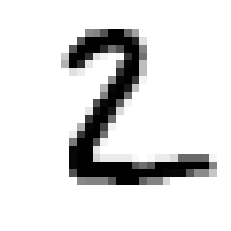

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X_test.iloc[1]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

Vamos a predecir sobre el número que seleccionamos más arriba.

In [9]:
sgd_clf.predict([some_digit])

array([2], dtype=uint8)

Y ahora vamos a visualizar algo llamado "matriz de confusión", que nos sirve para entender cómo se está equivocando nuestro predictor.

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5675,    1,   54,   23,   10,   32,   65,    6,   52,    5],
       [   2, 6417,  102,   34,    6,   21,   21,   14,  110,   15],
       [  51,   65, 5260,  113,   51,   28,  139,   87,  148,   16],
       [  39,   22,  359, 5102,   11,  223,   70,   69,  157,   79],
       [  37,   34,   56,   22, 5145,   23,   83,   97,  135,  210],
       [ 133,   34,   82,  299,   60, 4285,  247,   32,  172,   77],
       [  51,   14,   48,    7,   39,   78, 5655,    1,   24,    1],
       [  35,   23,   99,   49,   53,   21,    6, 5737,   46,  196],
       [  83,  112,  267,  374,   50,  220,   90,   60, 4462,  133],
       [  38,   20,   36,  153,  168,   67,    9,  524,  175, 4759]])

Ahora lo vamos a pasar a escala de grises. Los números altos van a representar errores. En cada fila tenemos el número real y en la columna las predicciones, por ejemplo de aquí desprendemos que muchos 5s son clasificados como 8s. Es algo que podríamos esperar que pasara.

In [ ]:
# Esta celda es para eliminar el ruido que produce la diagonal

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()